In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Linear Regression

In [137]:
datain = pd.read_csv("datasets/csv2.csv", skiprows=1)
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

551

In [138]:
# how to construct the A matrix
A = np.empty([2, dsize])
A[0] = np.arange(dsize)
A[1] = np.ones(dsize)
A = A.T

In [139]:
# fit the least square solution
out, res, rank, _ = np.linalg.lstsq(A, datalist, rcond=None)

In [140]:
# Prediction function
def predict(x):
    """
        input x: number (time)
    """
    return out[0]*x + out[1]

# How well it fits existing data & future?

In [141]:
extra = 200
predicted = np.zeros(dsize+extra)
for i in range(dsize+extra):
    predicted[i] = predict(i)

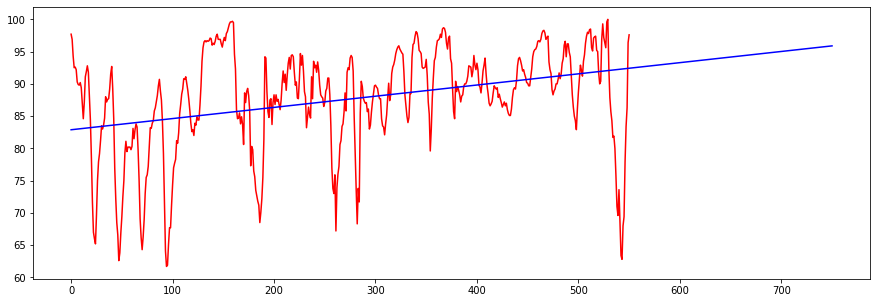

In [142]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color='r', label='Real')
plt.plot(np.arange(dsize+extra), predicted, color='b', label='Pred')
# plt.xlim(0, 550)

# Export predicted as time series

In [146]:
# generate additional time stamps
last_time = datain['Date'].values[-1]

extra_stamps = pd.date_range(start=last_time, freq='H', periods=extra+1).values[1:]

all_timestamps = np.concatenate([datain['Date'].values, extra_stamps])

out = pd.DataFrame()
out['Date'] = all_timestamps
out['Value'] = predicted
out.to_csv('datasets/lin_reg_results/humidity.csv', index=False, header=False)